In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

REMOVING MULTIPLE FORMS OF SAME VALUE

In [3]:
vdFile = pd.read_csv("VideoGamesSales.csv")
vdFile['Country']= vdFile['Country'].replace({'USA':'United States'})
#CamelCase
vdFile['Country']= vdFile['Country'].str.title()
vdFile['Month']= vdFile['Month'].replace({'November':'Nov',"October":"Oct"})

DELETING DUPLICATE ROWS

In [4]:
duplicate_Rows = vdFile[vdFile.duplicated()]
vdFile = vdFile.drop_duplicates()
print(vdFile.shape[0])

5893


REPLACING ALL NULL VALUES

In [5]:
vdFile['Region']=vdFile['Region'].fillna('North')
# print(vdFile.info())

REMOVE DOLLAR SIGN

In [6]:
# vdFile['NA_Sales']=vdFile['NA_Sales'].str.replace('$','').astype(float)

vdFile['NA_Sales'] = vdFile['NA_Sales'].replace('[$]','',regex=True)
vdFile['NA_Sales'] = pd.to_numeric(vdFile['NA_Sales'],errors='coerce')

FILL NULL VALUES AFTER REMOVING DOLLAR SIGN

In [7]:
Average_Sales = vdFile['NA_Sales'].mean()
vdFile['NA_Sales']=vdFile['NA_Sales'].fillna(Average_Sales)

RENAMING COLUMN

In [8]:
vdFile = vdFile.rename(columns={'NA_Sales':'National Sales','Global_Sales':'Global Sales','NA_Profit':'National Profit','Global_Profit':'Global Profit'})


In [17]:
sales_cap = vdFile['National Sales'].quantile(0.95)
vdFile['National Sales'] = np.where(vdFile['National Sales']>sales_cap,sales_cap,vdFile['National Sales'])


BAR CHART USING MATPLOTLIB ONLY

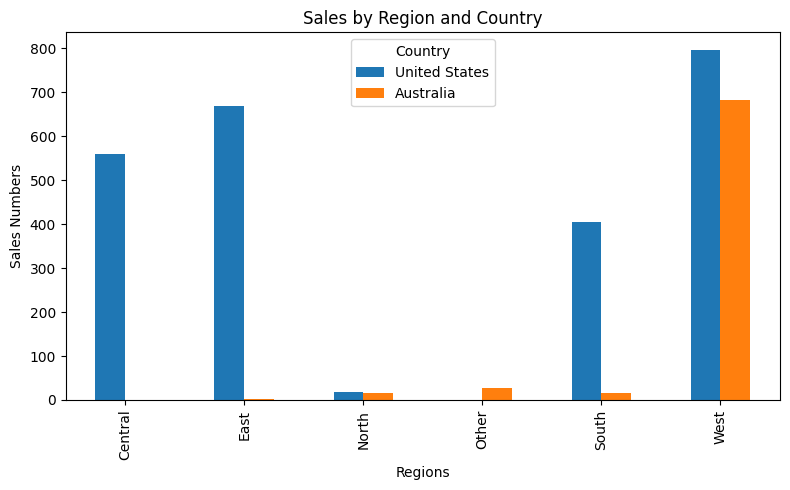

In [18]:
grouped = vdFile.groupby(['Region','Country'])['National Sales'].sum().unstack()
grouped = grouped[['United States','Australia']]
ax = grouped.plot(kind= 'bar',figsize=(8,5),title='Sales by Region and Country')
plt.xlabel('Regions')
plt.ylabel('Sales Numbers')
plt.tight_layout()
plt.show()

BAR CHART USING MATPLOTLIB AND SEABORN

    Region        Country  National Sales
9     West  United States         1020.79
2     East  United States          812.50
0  Central  United States          701.44
8     West      Australia          683.62
7    South  United States          507.48
4    North  United States           49.35
5    Other      Australia           28.21
6    South      Australia           16.30
3    North      Australia           15.24
1     East      Australia            1.35


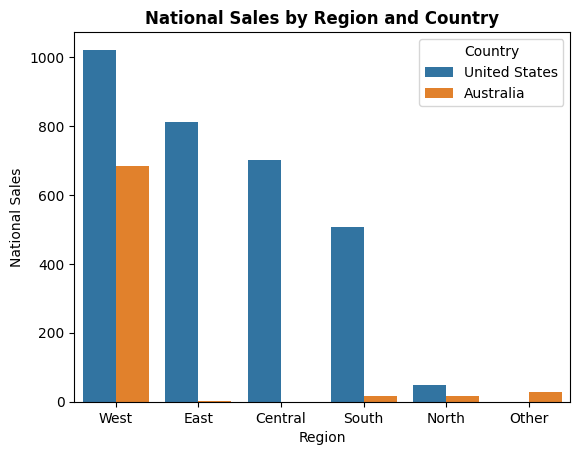

In [10]:
grouped = vdFile.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales',ascending = False)
print(grouped)
# plt.figure(figsize=(8,5))
#"Group by Region on the x-axis, and split bars inside each region by Country."
sns.barplot(data = grouped,x='Region',y='National Sales',hue='Country')
plt.title('National Sales by Region and Country',fontweight='bold',)
plt.xlabel('Region')
plt.ylabel('National Sales')
plt.show()


BOX PLOT

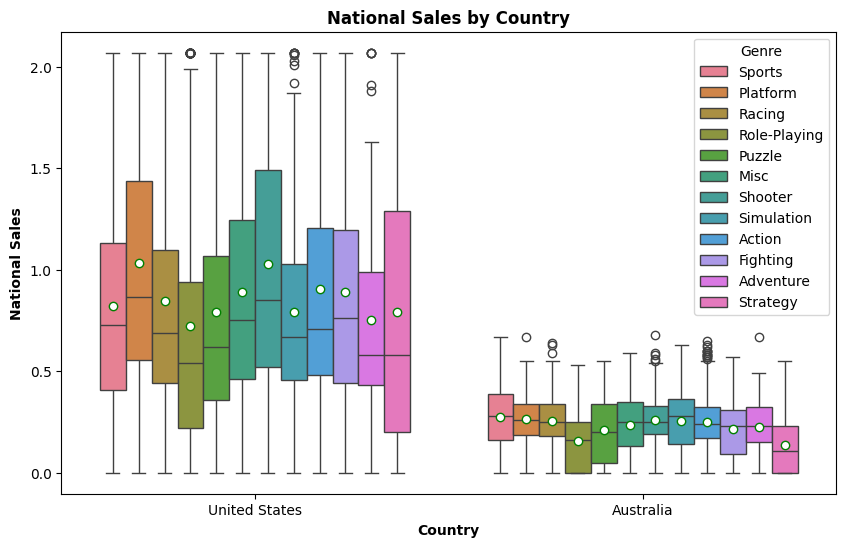

In [ ]:
# print(vdFile.columns)

plt.figure(figsize=(10,6))
sns.boxplot(x='Country',y='National Sales',data=vdFile,showmeans=True,hue='Genre',meanprops = {"marker":"o","markerfacecolor":"white","markersize":"6","markeredgecolor":"green"})
plt.title('National Sales by Country',fontweight='bold',)
plt.xlabel('Country',fontweight = 'bold')
plt.ylabel('National Sales',fontweight = 'bold')
plt.show()

PIE CHART BY ME

In [8]:
# plt.figure(figsize=(8,6))
national_sales_usa = vdFile[vdFile['Country']=='United States']['National Sales'].sum()
global_sales_usa = vdFile[vdFile['Country']=='United States']['Global Sales'].sum()
df = pd.DataFrame({
    'Sales Type' : ['National','Global'],
    'Total Sales': [national_sales_usa,global_sales_usa ]
})
print(df)
plt.figure(figsize=(4,4))
plt.pie(df['Total Sales'],labels=df['Sales Type'],autopct='%1.1f%%',startangle=90)
plt.legend()
plt.title('Divison of sales of USA')
plt.tight_layout()
plt.show()

KeyError: 'National Sales'

In [ ]:
sales = vdFile.groupby(['Country'])[['National Sales','Global Sales']].sum().reset_index()
Country = sales['Country']
National_Sales = sales['National Sales']
Global_Sales = sales['Global Sales']

fig, axs = plt.subplots(1,2,figsize=(10,7))
axs[0].pie(National_Sales,labels=Country,autopct = '%1.1f%%',startangle = 90)
axs[0].set_title('National Sales in USA')

axs[1].pie(Global_Sales,labels=Country,autopct = '%1.1f%%',startangle = 90)
axs[1].set_title('Global Sales in USA')
plt.show()

LINE CHART

<Axes: xlabel='Year', ylabel='National Sales'>

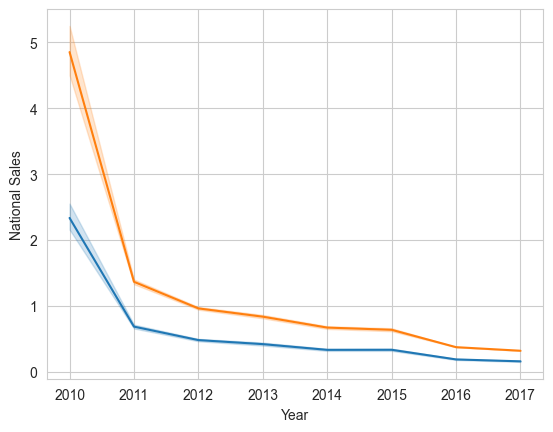

In [9]:
sns.set_style('whitegrid')
sns.lineplot(data=vdFile, x="Year",y ="National Sales",
            #  hue="Country"
             )
sns.lineplot(data=vdFile, x="Year",y ="Global Sales",
            #  hue="Country"
             )

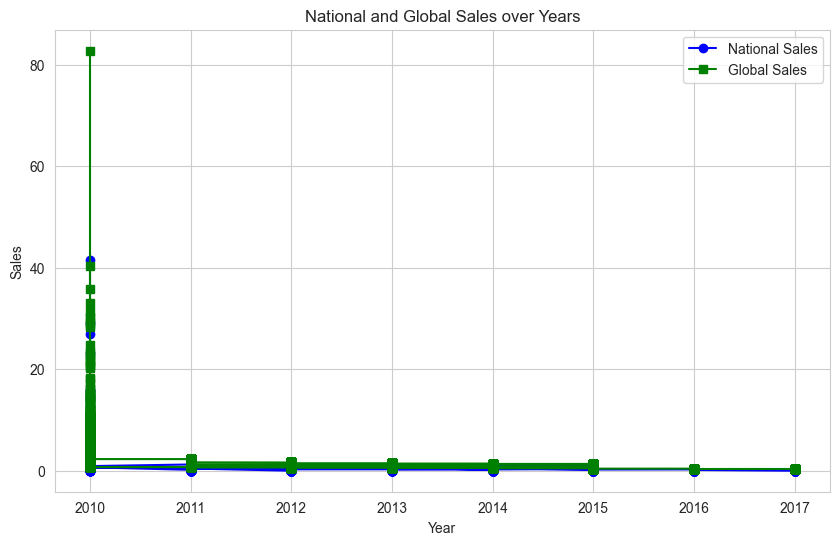

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(vdFile['Year'],vdFile['National Sales'],marker='o',linestyle='-',color='b',label='National Sales')
plt.plot(vdFile['Year'],vdFile['Global Sales'],marker='s',linestyle='--',color='g',label='Global Sales')

plt.title('National and Global Sales over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()

plt.grid(True)
plt.show()
